<a href="https://colab.research.google.com/github/GiulianoSS/Alura-Projects/blob/main/An%C3%A1lise_Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Análise estatística sobre a Covid 19**

## Carregar módulos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Carregar dados

In [ ]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [ ]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [ ]:
dados_paises_covid

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


## Ajustes



- Nomes das colunas

In [ ]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [ ]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [ ]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- Reajustar dados

In [ ]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [ ]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country', 'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [ ]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [ ]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

In [ ]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

In [ ]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [ ]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [ ]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- Combinar os datasets

In [ ]:
dados_paises_covid.shape

(330327, 6)

In [ ]:
dados_paises_covid_dead.shape

(330327, 6)

In [ ]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [ ]:
dados_covid.head()

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0


In [ ]:
dados_covid.shape

(330327, 7)

Quantos países existem no banco de dados?



In [ ]:
#filtrar coluna expecifica
np.unique(dados_covid['country'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

In [ ]:
len(np.unique(dados_covid['country'])) - 4

197

Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?


In [ ]:
# a função irá encontrar a data mais recente presente na coluna 'date'.
max_date = np.max(dados_covid['date'])

In [ ]:
# o dataframe dados_covid_filtrado contém apenas os dados mais recentes da pandemia de COVID-19 presentes no dataframe dados_covid.
dados_covid_filtrado = dados_covid[dados_covid['date'] == max_date]

In [ ]:
filtro_paises = ['Brazil', 'US', 'Italy']

In [ ]:
# O resultado é um novo dataframe que contém apenas os dados mais recentes da pandemia de COVID-19 para os países especificados na lista filtro_paises.
dados_covid_filtrado[dados_covid_filtrado['country'].isin(filtro_paises)]

,province,country,Lat,Long,date,infected,dead
330069,NaN,Brazil,-14.23500,-51.92530,2023-03-09,37076053,699276
330192,NaN,Italy,41.87194,12.56738,2023-03-09,25603510,188322
330298,NaN,US,40.00000,-100.00000,2023-03-09,103802702,1123836


Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?


In [ ]:
# # a função irá encontrar a data mais recente presente na coluna 'date'.
max_date = np.max(dados_covid['date'])

In [ ]:
# # o dataframe dados_covid_filtrado contém apenas os dados mais recentes da pandemia de COVID-19 presentes no dataframe dados_covid.
dados_covid_filtrado = dados_covid[dados_covid['date'] == max_date]

In [ ]:
# 1. "dados_covid_filtrado.groupby('country')" - agrupa o dataframe por país
# 2. ".agg(infected = pd.NamedAgg('infected', 'sum'), dead = pd.NamedAgg('dead', 'sum'))" - é usado para agregar as colunas 'infected' e 'dead' para cada país,
# mas nesse que a gente fez o '.agg()' está sendo usando para agregar as colunas usando a soma 'sum', além de renomear as colunas para 'infected' e 'dead'.
# 3. ".sort_values('infected', ascending = False)" - é usado para ordenar o dataframe resultante pela coluna 'infected' em ordem decrescente
# 4. ".head(10)" - Seleciona as 10 primeiras linhas do dataframe resultante, basicamente seleciona os 10 países com mais casos de COVID-19 confirmados

dados_covid_filtrado.groupby('country') \
                    .agg(infected = pd.NamedAgg('infected', 'sum'),
                         dead = pd.NamedAgg('dead', 'sum')) \
                    .sort_values('infected', ascending = False) \
                    .head(10)

,infected,dead
country,,
US,103802702,1123836
India,44690738,530779
France,39866718,166176
Germany,38249060,168935
Brazil,37076053,699276
Japan,33320438,72997
"Korea, South",30615522,34093
Italy,25603510,188322
United Kingdom,24658705,220721


In [ ]:
# igual a descrição de cima mas trocando de 'infected' para 'dead'
dados_covid_filtrado.groupby('country') \
                    .agg(infected = pd.NamedAgg('infected', 'sum'),
                         dead = pd.NamedAgg('dead', 'sum')) \
                    .sort_values('dead', ascending = False) \
                    .head(10)

,infected,dead
country,,
US,103802702,1123836
Brazil,37076053,699276
India,44690738,530779
Russia,22075858,388478
Mexico,7483444,333188
United Kingdom,24658705,220721
Peru,4487553,219539
Italy,25603510,188322
Germany,38249060,168935


Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que possuem maiores valores desta taxa?


In [ ]:
max_date = np.max(dados_covid['date'])

In [ ]:
dados_covid_filtrado = dados_covid[dados_covid['date'] == max_date]

In [ ]:
# 1. "dados_covid_filtrado.groupby('country')" - agrupa o dataframe por país
# 2. ".agg(infected = pd.NamedAgg('infected', 'sum'), dead = pd.NamedAgg('dead', 'sum'))" - é usado para agregar as colunas 'infected' e 'dead' para cada país
# mas nesse que a gente fez o '.agg()' está sendo usando para agregar as colunas usando a soma 'sum', além de renomear as colunas para 'infected' e 'dead'.
# 3. ".reset_index()" - ele redefine/altera o índice do dataframe resultante, quando o dataframe é agrupado o índice se torna a coluna usada para agrupar os dados.

dados_agrupados = dados_covid_filtrado.groupby('country') \
                    .agg(infected = pd.NamedAgg('infected', 'sum'),
                         dead = pd.NamedAgg('dead', 'sum')) \
                    .reset_index()

In [ ]:
# 1. 'dados_agrupados['dead']' aqui ele seleciona a coluna 'dead'
# 2. 'dados_agrupados['infected'] seleciona a coluna 'infected'
# 3. 'dados_agrupados['dead'] / dados_agrupados['infected']' - divide a coluna 'dead' pela coluna 'infected'
# 4. 'dados_agrupados['Taxa de Mortalidade'] =' faz a atribuição a uma nova coluna de taxas de mortalidade.
dados_agrupados['Taxa de Mortalidade'] = dados_agrupados['dead'] / dados_agrupados['infected']

In [ ]:
dados_agrupados.sort_values('Taxa de Mortalidade', ascending = False).head(12)

,country,infected,dead,Taxa de Mortalidade
93,"Korea, North",1,6,6.000000
107,MS Zaandam,9,2,0.222222
198,Yemen,11945,2159,0.180745
169,Sudan,63829,5017,0.078601
174,Syria,57467,3164,0.055058
164,Somalia,27324,1361,0.049810
141,Peru,4487553,219539,0.048922
54,Egypt,515759,24812,0.048108
117,Mexico,7483444,333188,0.044523
22,Bosnia and Herzegovina,401729,16280,0.040525


Gere os seguintes gráficos:


In [ ]:
# a) Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos
dados_agrupados_total = dados_covid.groupby(['country', 'date']) \
           .agg(infected = pd.NamedAgg('infected', 'sum'),
                dead = pd.NamedAgg('dead', 'sum')) \
            .reset_index()

In [ ]:
dados_agrupados_total

,country,date,infected,dead
0,Afghanistan,2020-01-22,0,0
1,Afghanistan,2020-01-23,0,0
2,Afghanistan,2020-01-24,0,0
3,Afghanistan,2020-01-25,0,0
4,Afghanistan,2020-01-26,0,0
...,...,...,...,...
229738,Zimbabwe,2023-03-05,264127,5668
229739,Zimbabwe,2023-03-06,264127,5668
229740,Zimbabwe,2023-03-07,264127,5668
229741,Zimbabwe,2023-03-08,264276,5671


In [ ]:
paises_selecionados = ['Brazil', 'US']

In [ ]:
# 1. dados_agrupados_total[dados_agrupados_total['country'].isin(paises_selecionados)] seleciona apenas as linhas do dataframe dados_agrupados_total cujo valor na coluna 'country' está contido na lista paises_selecionados.
# Isso é feito usando o método .isin() da série 'country'.
# 2. dados_br_us = atribui o novo dataframe resultante à variável dados_br_us.
# 3. O resultado é um novo dataframe que contém as informações apenas para os países especificados em paises_selecionados.
dados_br_us = dados_agrupados_total[dados_agrupados_total['country'].isin(paises_selecionados)]

In [ ]:
# 1. dados_br_us.pivot() chama o método .pivot() do dataframe dados_br_us.
# 2. index = 'date' especifica que a coluna 'date' deve ser usada como o índice do novo dataframe.
# 3. columns = 'country' especifica que os valores únicos na coluna 'country' devem ser usados para criar novas colunas no novo dataframe.
# 4. values = 'infected' especifica que os valores da coluna 'infected' devem ser usados para preencher o novo dataframe.
# 5. Basicamente o resultado é um novo dataframe em que as colunas correspondem aos valores únicos na coluna 'country', o índice é a coluna 'date' e os valores são os valores da coluna 'infected'.
dados_br_us = dados_br_us.pivot(index = 'date',
                                columns = 'country',
                                values = 'infected')

Text(0.5, 1.0, 'Comparativo Brasil  x EUA')

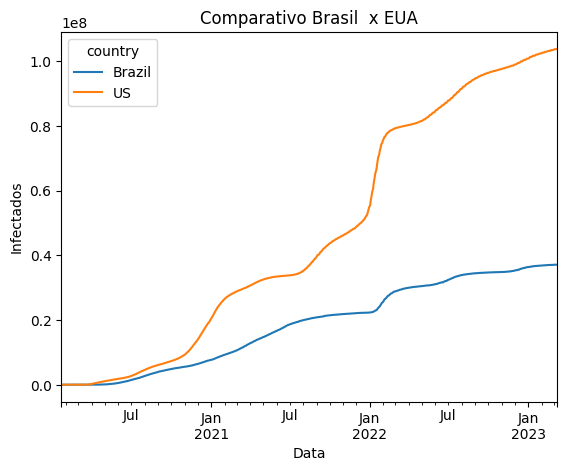

In [ ]:
# 1. dados_br_us.plot.line() chama o método  .plot.line() do dataframe dados_br_us. Esse método  plota um gráfico de linha dos valores presentes no  dataframe.
# 2. plt.xlabel('Data') define o rótulo do eixo x  do gráfico como 'Data'.
# 3. plt.ylabel('Infectados') define o rótulo do  eixo y do gráfico como 'Infectados'.
# 4. plt.title('Comparativo Brasil x EUA') define  o título do gráfico como 'Comparativo Brasil x  EUA'.
dados_br_us.plot.line ()
plt.xlabel ( 'Dados' )
plt.ylabel ( 'Infectados' )
plt.title ( '

In [ ]:
# b) Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.
dados_br_us = dados_agrupados_total[dados_agrupados_total['country'].isin(paises_selecionados)]

In [ ]:
dados_br_us_dead = dados_br_us.pivot(index = 'date',
                                columns = 'country',
                                values = 'dead')

Text(0.5, 1.0, 'Comparativo Brasil  x EUA')

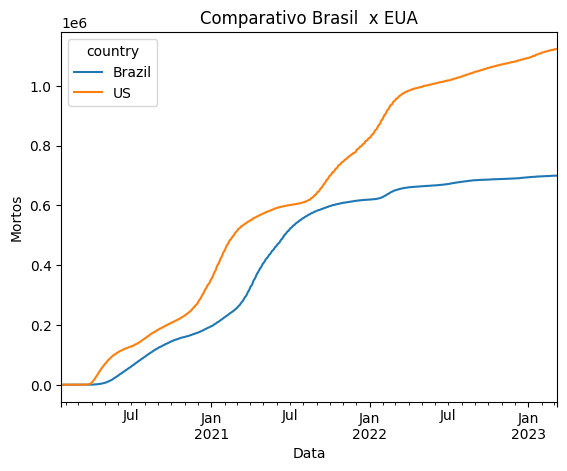

In [ ]:
ax = dados_br_us_dead.plot.line()
plt.xlabel('Data')
plt.ylabel('Mortos')
plt.title('Comparativo Brasil  x EUA')

In [ ]:
# c) Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar.
paises_selecionados= ['Brazil', 'US']
data = '2022-03-20'

In [ ]:
dados_paises_filtrados = dados_agrupados_total[(dados_agrupados_total['date'] == data) & \
                                               (dados_agrupados_total['country'].isin(paises_selecionados))].reset_index(drop=True)

In [ ]:
dados_paises_filtrados

,country,date,infected,dead
0,Brazil,2022-03-20,29637814,657495
1,US,2022-03-20,79867776,974314


Text(0.5, 1.0, 'Infectados Brasil x EUA em 2022-03-20')

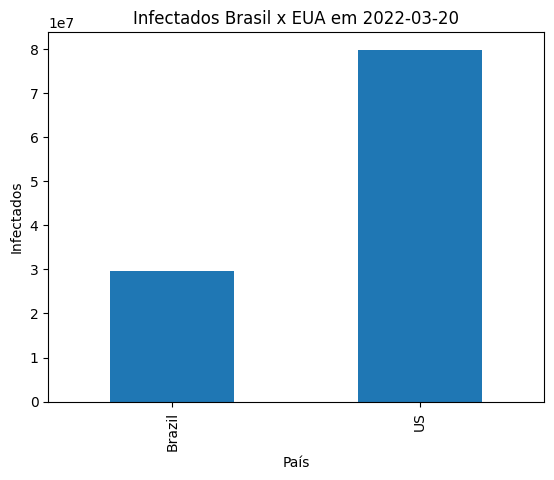

In [ ]:
ax = dados_paises_filtrados.plot.bar(x = 'country',
                                     y = 'infected',
                                     legend = None)
plt.xlabel('País')
plt.ylabel('Infectados')
plt.title('Infectados Brasil x EUA em '+str(data))

Text(0.5, 1.0, 'Mortos Brasil x EUA em 2022-03-20')

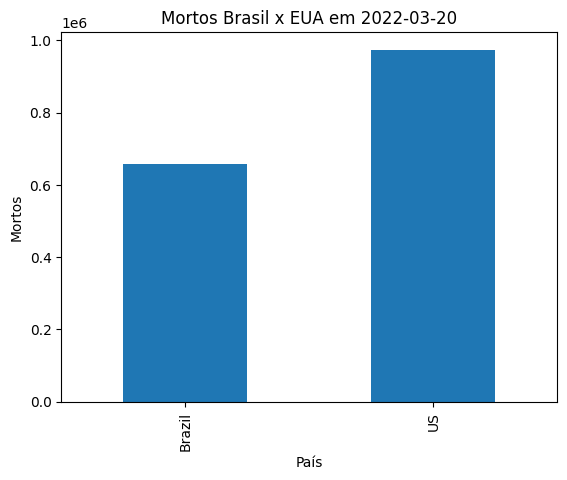

In [ ]:
# d) Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.
ax = dados_paises_filtrados.plot.bar(x = 'country',
                                     y = 'dead',
                                     legend = None)
plt.xlabel('País')
plt.ylabel('Mortos')
plt.title('Mortos Brasil x EUA em '+str(data))

In [ ]:
# e) Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.
dados_paises_filtrados['mort'] = dados_paises_filtrados['dead'] / dados_paises_filtrados['infected']

Text(0.5, 1.0, 'Mortalidade Brasil x EUA em 2022-03-20')

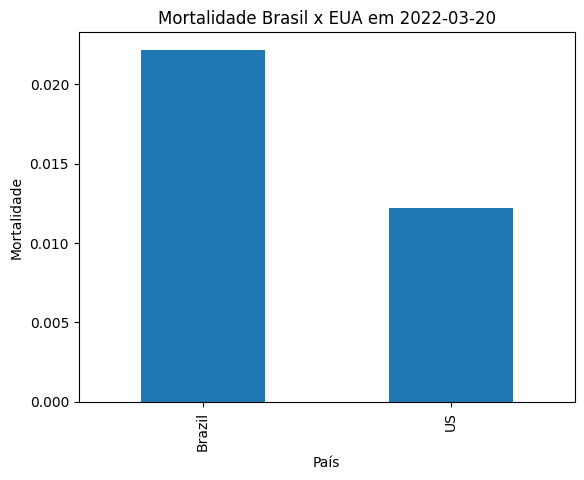

In [ ]:
ax = dados_paises_filtrados.plot.bar(x = 'country',
                                     y = 'mort',
                                     legend = None)
plt.xlabel('País')
plt.ylabel('Mortalidade')
plt.title('Mortalidade Brasil x EUA em '+str(data))